# Load packages & data

In [1]:
# Load packages
import tifffile as tiff 
import changeos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the TIFF file
data_path = "C:/Users/marce/OneDrive/Dokumente/Master/drittes_Semester/Seminar_Topics_of_Image_Analysis/data/"
pre_im = tiff.imread(data_path + "pre_1.tif")
post_im = tiff.imread(data_path + "post_1.tif")


# Resize images to fit input size 

In [2]:
# Check Image Shape
print("Pre-Image Shape:", pre_im.shape)
print("Post-Image Shape:", post_im.shape) # the fourth channel is an alpha channel  

# Remove Fourth Channel and crop out the top left corner (easy and straighforward way to get the correct size)
pre_im = pre_im[:1408, :1696, :3]
post_im = post_im[:1408, :1696, :3]

# Check Image Shape again & Verify if Image is Numpy Array 
print("Pre-Image Shape:", pre_im.shape, "Pre-Image Type:", type(pre_im))
print("Post-Image Shape:", post_im.shape, "Post-Image Type:", type(post_im)) # Fourth Channel succesfully excluded

Pre-Image Shape: (1413, 1726, 4)
Post-Image Shape: (1413, 1726, 4)
Pre-Image Shape: (1408, 1696, 3) Pre-Image Type: <class 'numpy.ndarray'>
Post-Image Shape: (1408, 1696, 3) Post-Image Type: <class 'numpy.ndarray'>


# Plot Images for verification 

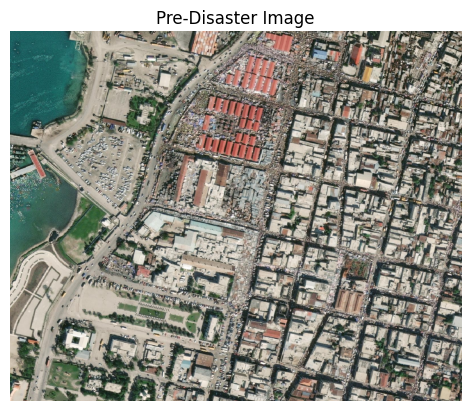

In [2]:
plt.imshow(pre_im)
plt.title("Pre-Disaster Image")
plt.axis('off')
plt.show()

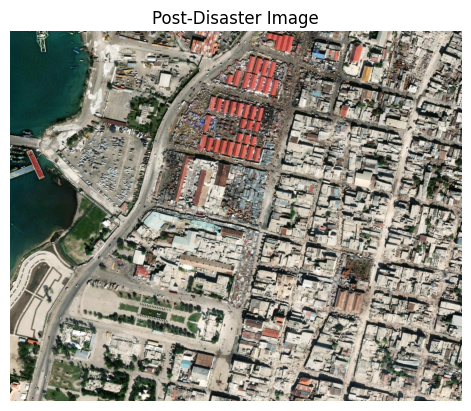

In [3]:
plt.imshow(post_im)
plt.title("Post-Disaster Image")
plt.axis('off') 
plt.show()

# Load and apply ChangeOS

In [3]:
# Constructing ChangeOS model
model = changeos.from_name('changeos_r101')

# Model inference
loc_r101, dam_r101 = model(pre_im, post_im)

# Put color map on raw prediction
loc_r101, dam_r101 = changeos.visualize(loc_r101, dam_r101)

In [4]:
model = changeos.from_name('changeos_r18')
loc_r18, dam_r18 = model(pre_im, post_im)
loc_r18, dam_r18 = changeos.visualize(loc_r18, dam_r18)

In [5]:
model = changeos.from_name('changeos_r34')
loc_r34, dam_r34 = model(pre_im, post_im)
loc_r34, dam_r34 = changeos.visualize(loc_r34, dam_r34)

In [6]:
model = changeos.from_name('changeos_r50')
loc_r50, dam_r50 = model(pre_im, post_im)
loc_r50, dam_r50 = changeos.visualize(loc_r50, dam_r50)

# Visualize the results

### Plot with legend 

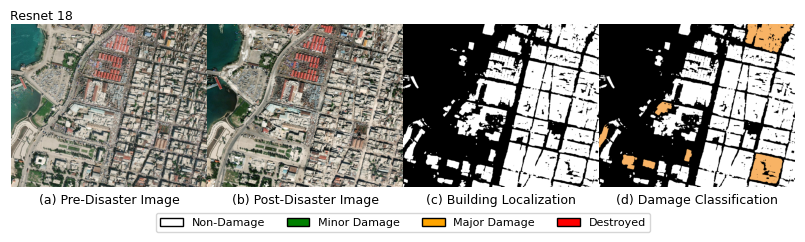

In [102]:
plot_path = "C:\/Users/marce/OneDrive/Dokumente/Master/drittes_Semester/Seminar_Topics_of_Image_Analysis/plots/"
file_name = "resnet_18.pdf"

def plot_results_with_legend(pre_im, post_im, build_loc, dam_class, title, file_name):
    # Create custom legend entries
    white_patch = mpatches.Patch(facecolor='white', label='Non-Damage', edgecolor="black")
    green_patch = mpatches.Patch(facecolor='green', label='Minor Damage', edgecolor="black")
    orange_patch = mpatches.Patch(facecolor='orange', label='Major Damage', edgecolor="black")
    red_patch = mpatches.Patch(facecolor='red', label='Destroyed', edgecolor="black")
    
    # Create figure 
    fig = plt.figure(figsize=(8, 4))
    
    # Add subplots
    ax1 = fig.add_subplot(141)
    ax1.imshow(pre_im)
    ax1.axis('off')
    ax1.text(0.5, -0.1, "(a) Pre-Disaster Image", color='black', fontsize=9, 
             ha='center', transform=ax1.transAxes) 

    ax2 = fig.add_subplot(142)
    ax2.imshow(post_im)
    ax2.axis('off')
    ax2.text(0.5, -0.1, "(b) Post-Disaster Image", color='black', fontsize=9, 
             ha='center', transform=ax2.transAxes)

    ax3 = fig.add_subplot(143)
    ax3.imshow(build_loc)
    ax3.axis('off')
    ax3.text(0.5, -0.1, "(c) Building Localization", color='black', fontsize=9, 
             ha='center', transform=ax3.transAxes)

    ax4 = fig.add_subplot(144)
    ax4.imshow(dam_class)
    ax4.axis('off')
    ax4.text(0.5, -0.1, "(d) Damage Classification", color='black', fontsize=9, 
             ha='center', transform=ax4.transAxes)
    
    # Adjust subplots to remove space
    plt.subplots_adjust(left=0.01, right=0.99, top=0.75, bottom=0.25, wspace=0, hspace=0)
    
    # Add legend
    fig.legend(handles=[white_patch, green_patch, orange_patch, red_patch], 
               loc='lower center', bbox_to_anchor=(0.5, 0.17), fontsize=8, ncol=4)
    
    # Add title 
    plt.suptitle(title, fontsize=9, y=0.74, x=0.048)
    
    # Save figure
    plt.savefig(plot_path + file_name, bbox_inches='tight')
    
    # Show plot
    plt.show()
    

# Call the function
plot_results_with_legend(pre_im, post_im, loc_r18, dam_r18, "Resnet 18", file_name)


### Plots without legend

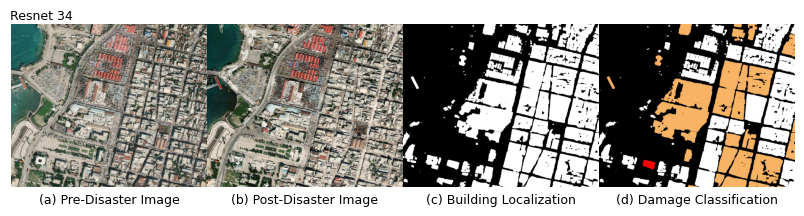

In [103]:
plot_path = "C:\/Users/marce/OneDrive/Dokumente/Master/drittes_Semester/Seminar_Topics_of_Image_Analysis/plots/"
file_name = "resnet_34.pdf"

def plot_results_without_legend(pre_im, post_im, build_loc, dam_class, title, file_name):

    # Create figure 
    fig = plt.figure(figsize=(8, 4))
    
    # Add subplots
    ax1 = fig.add_subplot(141)
    ax1.imshow(pre_im)
    ax1.axis('off')
    ax1.text(0.5, -0.1, "(a) Pre-Disaster Image", color='black', fontsize=9, 
             ha='center', transform=ax1.transAxes) 

    ax2 = fig.add_subplot(142)
    ax2.imshow(post_im)
    ax2.axis('off')
    ax2.text(0.5, -0.1, "(b) Post-Disaster Image", color='black', fontsize=9, 
             ha='center', transform=ax2.transAxes)

    ax3 = fig.add_subplot(143)
    ax3.imshow(build_loc)
    ax3.axis('off')
    ax3.text(0.5, -0.1, "(c) Building Localization", color='black', fontsize=9, 
             ha='center', transform=ax3.transAxes)

    ax4 = fig.add_subplot(144)
    ax4.imshow(dam_class)
    ax4.axis('off')
    ax4.text(0.5, -0.1, "(d) Damage Classification", color='black', fontsize=9, 
             ha='center', transform=ax4.transAxes)
    
    # Adjust subplots to remove space
    plt.subplots_adjust(left=0.01, right=0.99, top=0.75, bottom=0.25, wspace=0, hspace=0)
    
    # Add title 
    plt.suptitle(title, fontsize=9, y=0.74, x=0.048)
    
    # Save figure
    plt.savefig(plot_path + file_name, bbox_inches='tight')
    
    # Show plot
    plt.show()
    

# Call the function
plot_results_without_legend(pre_im, post_im, loc_r34, dam_r34, "Resnet 34", file_name)


### Apply functions

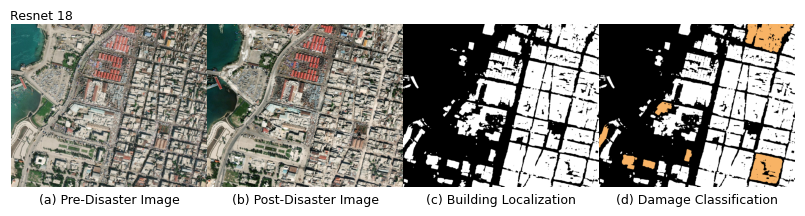

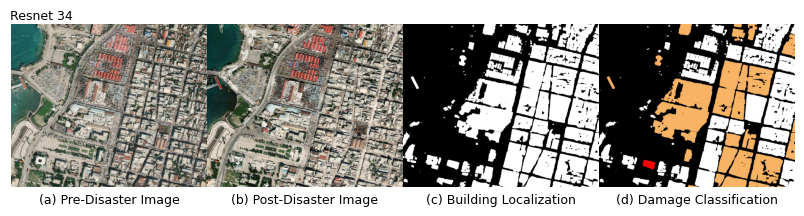

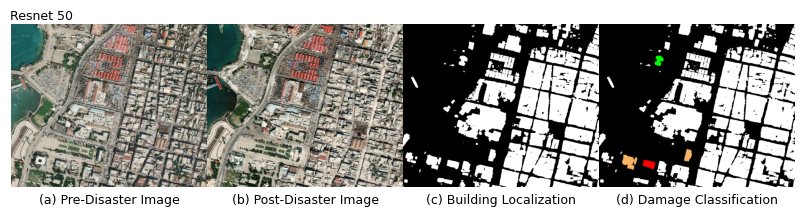

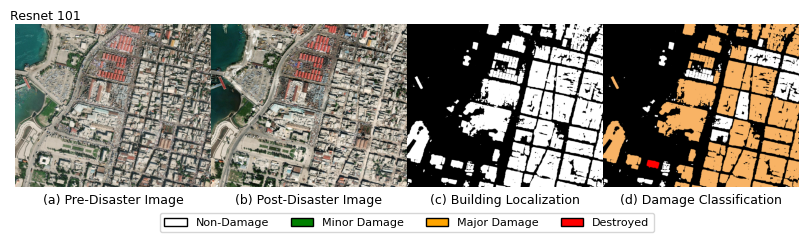

In [105]:
plot_results_without_legend(pre_im, post_im, loc_r18, dam_r18, "Resnet 18", "resnet_18.png")
plot_results_without_legend(pre_im, post_im, loc_r34, dam_r34, "Resnet 34", "resnet_34.png")
plot_results_without_legend(pre_im, post_im, loc_r50, dam_r50, "Resnet 50", "resnet_50.png")
plot_results_with_legend(pre_im, post_im, loc_r101, dam_r101, "Resnet 101", "resnet_101.png")